In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
data_import = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/Daily_attendance.csv')

In [16]:
all_years_test = data_import
all_years_test.set_index('Full_Date', inplace=True)

In [23]:
all_years_test.index = pd.to_datetime(all_years_test.index)
ds = all_years_test.index.to_series()
all_years_test['YEAR'] = ds.dt.year
all_years_test['MONTH'] = ds.dt.month
all_years_test['DAY_OF_WEEK'] = ds.dt.dayofweek
all_years_test['DAY'] = ds.dt.day

In [26]:
all_years_test.drop(columns=['snow_1h'], inplace=True)

In [27]:
mask = np.random.rand(len(all_years_test)) < 0.8
df_train = all_years_test[mask]
df_test = all_years_test[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=358
Testing data set length=102


In [28]:
expr = """value ~ DAY  + DAY_OF_WEEK + MONTH + YEAR + temp + temp_min + temp_max + pressure + humidity + wind_speed + wind_gust + rain_1h + federal_holiday_flag + school_holiday_flag"""

In [29]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [30]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [31]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  value   No. Observations:                  355
Model:                            GLM   Df Residuals:                      340
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20996.
Date:                Tue, 22 Mar 2022   Deviance:                       38830.
Time:                        10:31:21   Pearson chi2:                 3.72e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [32]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Full_Date                                                       
2019-05-03   563.369381   4.065767     555.456717     571.394763
2019-05-04   649.765093   4.996006     640.046514     659.631240
2019-05-10   531.708560   3.840452     524.234440     539.289240
2019-05-17   683.386640   4.919473     673.812351     693.096971
2019-05-18   837.595665   4.670940     828.490641     846.800752
...                 ...        ...            ...            ...
2021-10-11  1715.980125  24.614778    1668.407917    1764.908784
2021-10-19  1344.710794   9.098934    1326.994944    1362.663156
2021-10-25  1077.945109   6.879658    1064.545210    1091.513678
2021-10-27  1321.830230  10.770570    1300.887972    1343.109626
2021-10-30  1376.013727   7.724298    1360.957360    1391.236664

[102 rows x 4 columns]


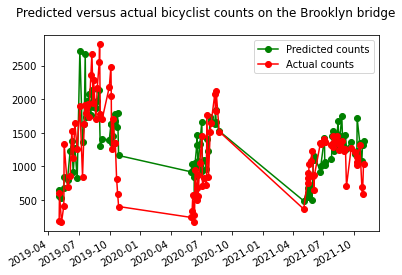

In [34]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['value']
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
fig.autofmt_xdate()
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

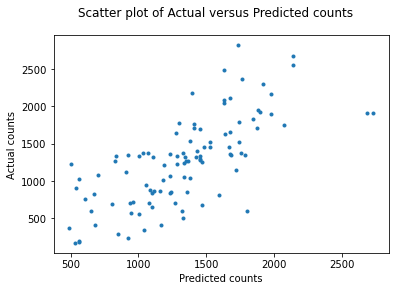

In [35]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

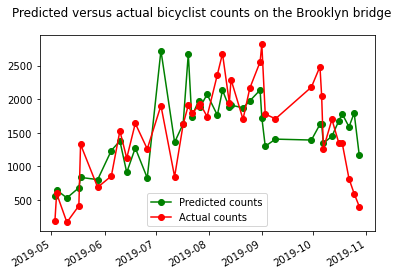

In [40]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['value']
predicted_counts = predicted_counts[predicted_counts.index.year==2019]
actual_counts = actual_counts[actual_counts.index.year==2019]
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(predicted_counts.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(actual_counts.index, actual_counts, 'ro-', label='Actual counts')
fig.autofmt_xdate()
plt.legend(handles=[predicted, actual])
plt.show()

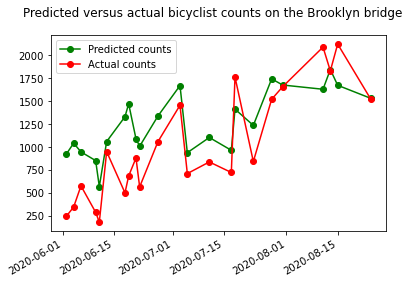

In [38]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['value']
predicted_counts = predicted_counts[predicted_counts.index.year==2020]
actual_counts = actual_counts[actual_counts.index.year==2020]
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(predicted_counts.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(actual_counts.index, actual_counts, 'ro-', label='Actual counts')
fig.autofmt_xdate()
plt.legend(handles=[predicted, actual])
plt.show()

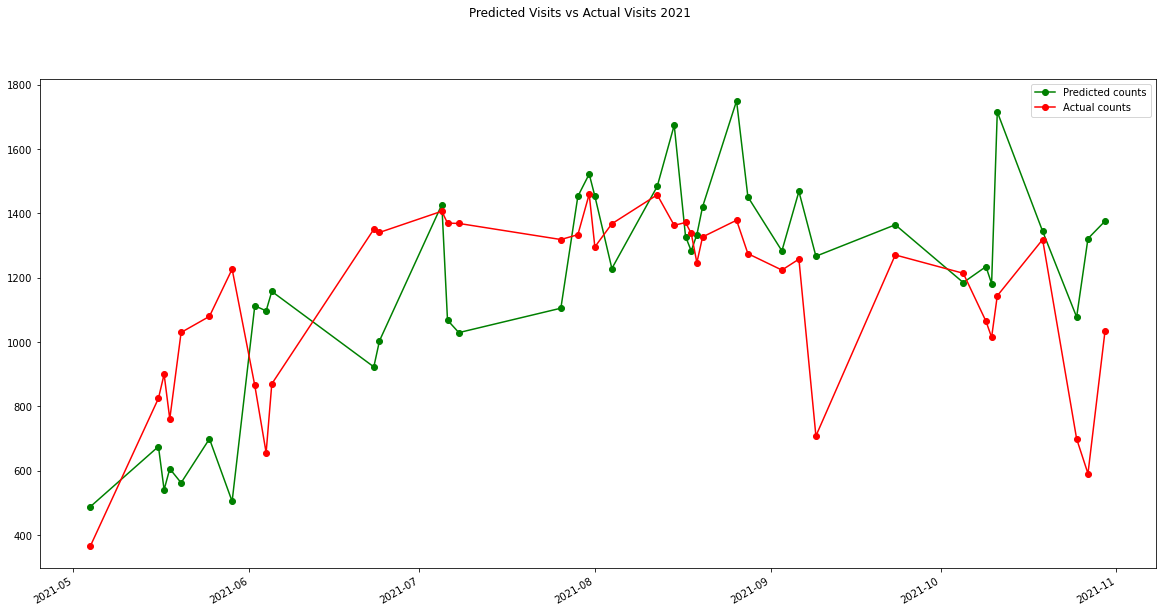

In [46]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['value']
predicted_counts = predicted_counts[predicted_counts.index.year==2021]
actual_counts = actual_counts[actual_counts.index.year==2021]
fig = plt.figure(figsize=(20,10))
fig.suptitle('Predicted Visits vs Actual Visits 2021')
predicted, = plt.plot(predicted_counts.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(actual_counts.index, actual_counts, 'ro-', label='Actual counts')
# ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)
fig.autofmt_xdate()
plt.legend(handles=[predicted, actual])
plt.show()